# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project analyzes traits of missed scheduled medical appointments, based off a dataset of more than 100,000 appointments, provided by Joni Hopper via kaggle.com.

The dataset and author's details can be found here: https://www.kaggle.com/joniarroba/noshowappointments/home

### Dataset Columns Definitions

<table style="display: block; width: 100%;" cellspacing="5" cellpadding="5">
    <tbody>
      <tr>
        <th style="text-align: left; width: 10%;">Name</th>
        <th style="text-align: center; width: 10%;">Data Type</th>
        <th style="text-align: left; width: 70%;">Brief Description</th>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">PatienID</td>
        <td style="text-align: center; width: 10%;">float</td>
        <td style="text-align: left; width: 70%;">Patient unique identifier</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">AppointmentID</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Appointment unique identifier</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Gender</td>
        <td style="text-align: center; width: 10%;">string</td>
        <td style="text-align: left; width: 70%;">'F' for female or 'M' for male</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">ScheduledDay</td>
        <td style="text-align: center; width: 10%;">string</td>
        <td style="text-align: left; width: 70%;">Date the caller called, to schedule the appointment</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">AppointmentDay</td>
        <td style="text-align: center; width: 10%;">string</td>
        <td style="text-align: left; width: 70%;">Date scheduled for the appointment</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Age</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Age of Patient</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Neighbourhood</td>
        <td style="text-align: center; width: 10%;">string</td>
        <td style="text-align: left; width: 70%;">The location where the appointment takes place</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Scholarship</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Patient enrolled in the Brazilian welfare program, Bolsa Família</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Hipertension</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Patient has hypertension</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Diabetes</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Patient has diabetes</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Alcoholism</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Patient is an alcoholic</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">Handcap</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Patient is handicapped</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">SMS_received</td>
        <td style="text-align: center; width: 10%;">int</td>
        <td style="text-align: left; width: 70%;">Patient received at least 1 SMS</td>
      </tr>
      <tr>
        <td style="text-align: left; width: 10%;">No-show</td>
        <td style="text-align: center; width: 10%;">string</td>
        <td style="text-align: left; width: 70%;">'Yes' or 'No'. Patient checked-in for the appointment</td>
      </tr>
    </tbody>
  </table>

<a id='wrangling'></a>
## Data Wrangling

### Imports

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

### General Properties

Load the data, perform operations to inspect data types and look for instances of missing or possibly errant data.

In [120]:
# Load the dataset into a dataframe.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [121]:
# Evaluate the headers and few lines of the data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [122]:
# Get the shape of the dataset.
df.shape

(110527, 14)

In [123]:
# Describe the data to look for features to evaluate, data concerns and possibly new features.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [124]:
# Review the data size and object types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [125]:
# List columns and null values sum
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [126]:
# List duplicate count
df.duplicated().sum()

0

In [127]:
# List total records
df.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

In [128]:
# List number of unique records
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [129]:
# Find the datatype
type(df.Gender[0])

str

In [130]:
# Find the datatype
type(df.ScheduledDay[0])

str

In [131]:
# Find the datatype
type(df.Gender[0])

str

In [132]:
# Find the datatype
type(df.AppointmentDay[0])

str

In [133]:
# Find the datatype
type(df.Neighbourhood[0])

str

In [134]:
# Find the datatype
type(df['No-show'][0])

str

### Schema Changes

Let's make a few changes to the column headers for clarity:
- Lowercase column names
- Separate words within the column name (Ex: AppointmentDay to appointment_day)
- Fix misspellings
- Change British English to American English
- Rename "no_show" 'missed_appointment'. The name is confusing since the values are 'No' or 'Yes'.
- Rename 'appointment_day' to 'appointment_date'
- Rename 'scheduled_date' to 'date_time_scheduled'

#### Columns

In [135]:
# Create a new array of labels that take care of the following nomenclature mentions above: lowercase, proper American English, misspelled words fixed

# Create headers
headers = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = headers

df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

#### No-show

In [136]:
# Change 'no_show' to 'missed_appointment'
df.rename(columns={'no_show':'missed_appointment'}, inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'missed_appointment'],
      dtype='object')

#### appointment_day

In [137]:
# Change 'appointment_day' to 'appointment_date'

df.rename(columns={'appointment_day':'appointment_date'}, inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_date', 'age', 'neighborhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'missed_appointment'],
      dtype='object')

#### scheduled_day

In [138]:
# Change 'scheduled_day' to 'date_time_scheduled'

df.rename(columns={'scheduled_day':'date_time_scheduled'}, inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'date_time_scheduled',
       'appointment_date', 'age', 'neighborhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'missed_appointment'],
      dtype='object')

#### Review changes with data

In [139]:
df.head()

,patient_id,appointment_id,gender,date_time_scheduled,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed_appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Quality
Based on the data output in the General Properties section, a few observations are made about quality of the data:
- There is no need to fill in NaN or empty values, none of the columns have null values.
- Age seems to have some outliers that need to be addressed
- Delete appointment_id column if the column has no duplicates, suggesting this column is only a unique identifier
- Convert handicap to an int. The data seems to represent a scale and we can't be interpreted as a boolean. We can assume it to be a true/false value though.
- Convert patient_id from float to an int. Int data types are easier to work with.
- Convert date_time_scheduled column values from string to date object. We will be able to do date math on date objects.
- Convert appointment_date column values from string to date object. We will be able to do date math on date objects.
- Convert missed_appointment string to int data type

#### Clean age

In [140]:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

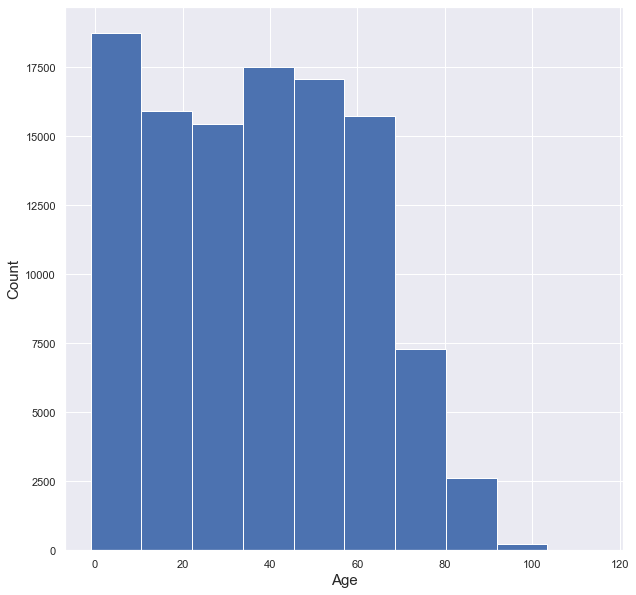

In [141]:
# Set SNS settings for all plots.
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,10)})

df.age.hist();
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [142]:
# It's possible age 0 (zero) is for babies less than 1 year old, but, we can't assume that. Unfortately the 
# data type is not a float, which could represent less than 1 year old.

# Also drop records less than zero

# Drop both types of records.

# Get names of indexes for which column age of zero
records = df[df.age <= 0].index

# Delete records
df.drop(records , inplace=True)

In [143]:
# Show that the age data has been cleaned.
df.age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

#### Clean patient_id

In [144]:
# Convert (if not converted already) missed_appointments by converting Yes/No strings to 1/0 integers.

if df.patient_id.dtype != 'int64':
    df.patient_id = df.patient_id.astype('int64')

print(df.patient_id.dtype)

int64


#### Clean handicap

In [145]:
# Create a handicap DataFrame to help us sum up the handcap values

handicap = df.groupby(['patient_id'])['handicap'].sum().reset_index()
handicap.columns = ['patient_id', 'handicap_counts']
handicap.set_index('patient_id')

handicap.head()

,patient_id,handicap_counts
0,39217,0
1,43741,0
2,93779,0
3,141724,0
4,537615,0


In [146]:
# Populate the new feature, called repeat_handicap. By default, no one is a repeat handicap. 
# Only the handicaps that have duplicate records get updated.

# Note: This code block takes a while to process.
        
# Function to use within the apply
def get_handicap_counts(patient_id):
    if (handicap.query('patient_id == {}'.format(patient_id)).values[0][1]) > 0:
        return 1
    else:
        return 0

# handicap.query('patient_id == {}'.format('3423831496')).values[0][1]


# # Determine if the handicap has multiple visits, if so, update the repeat_handicap column.
df['handicap'] = df.patient_id.apply(get_handicap_counts) # 2min 08sec

# Show summary of data
df.head()

,patient_id,appointment_id,gender,date_time_scheduled,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed_appointment
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Clean date_time_scheduled

In [147]:
# Convert date_time_scheduled from string to datetime object.
# Note: The timezone will be set to UTC and the timezone offset will be removed.

if isinstance(df.date_time_scheduled[0], str):
    df.date_time_scheduled = pd.to_datetime(df.date_time_scheduled.values, format='%Y-%m-%d %H:%M:%S').tz_localize(None)
    
print(df.date_time_scheduled.dtype)

datetime64[ns]


#### Clean appointment_date

In [148]:
# Convert appointment_date from string to datetime object.
# Note: Time was not provided so timezone offset will be removed.

if isinstance(df.appointment_date[0], str):
    df.appointment_date = pd.to_datetime(df.appointment_date.values, format='%Y-%m-%d %H:%M:%S').tz_localize(None)

print(df.appointment_date.dtype)

datetime64[ns]


#### Clean missed_appointment

In [149]:
# Convert (if not converted already) missed_appointments by converting Yes/No strings to 1/0 integers.

if df.missed_appointment.dtype != 'int64':
    ma_map = {'Yes': 1, 'No': 0}
    df['missed_appointment'] = df['missed_appointment'].map(ma_map)

# Print out the type
df.missed_appointment.dtype

dtype('int64')

#### Clean appointment_id

In [150]:
# If appointment_id is a unique identifier, the column can be removed.
# Let's see if this column has any duplicates, if not, remove it 

if 'appointment_id' in df.columns:
    if df.appointment_id.count() == df.appointment_id.nunique():
        df.drop("appointment_id", axis=1, inplace=True)

### Feature Engineering
As it was mentioned in the Introduction section, I want to add some new features to the dataset that I think will provide some clues to the 30% missed appointment rate.
- Repeat Patient
- Healthy Patient
- Time Delta Days
- Appointment Day Of Week

#### Repeat patient
If the patient visits the office more than once a year, let's deem them as a repeat patient.

In [151]:
# Create a patient_counts DataFrame to help us populate the new column in the next code block.

patient_counts = pd.DataFrame(df.patient_id.value_counts()).reset_index()
patient_counts.columns = ['patient_id', 'counts']
patient_counts.set_index('patient_id')

patient_counts.head()

,patient_id,counts
0,822145925426128,88
1,99637671331,84
2,26886125921145,70
3,33534783483176,65
4,6264198675331,62


In [152]:
# Populate the new feature, called repeat_patient. By default, no one is a repeat patient. 
# Only the patients that have duplicate records get updated.

# Note: This code block takes a while to process.
        
# Function to use within the apply
def get_patient_counts(patient_id):
    if (patient_counts.query('patient_id == {}'.format(patient_id)).values[0][1]) > 1:
        return 1
    else:
        return 0

# Determine if the patient has multiple visits, if so, update the repeat_patient column.
df['repeat_patient'] = df.patient_id.apply(get_patient_counts) # 2min 11sec

# Show the repeat_patient data
df.repeat_patient.value_counts()

1    70138
0    36849
Name: repeat_patient, dtype: int64

#### Healthy patient
If the patient has diabetes, hypertension or alcoholism, let's deem them as unhealthy.

In [153]:
# Loop through the list of patients and determine if they are healthy. Based on the answer,
# Add the new column with the proper boolean value

df['healthy_patient'] = df.apply(lambda row: 1 if (row['hypertension'] + row['diabetes'] + row['alcoholism']) == 0 else 0, axis = 1)

# Show the healthy_patient data
df.healthy_patient.value_counts()

1    81772
0    25215
Name: healthy_patient, dtype: int64

#### Time Delta Days
Calculate the time, in days, from the day of scheduling the appointment to the appointment date.

In [154]:
# Loop through the list of patients and calculate the time delta between date_time_scheduled and appointment_date.

def calculate_time_delta(scheduled, appointment):
    return (appointment - scheduled)

time_delta = df.apply(lambda row: calculate_time_delta(row['date_time_scheduled'], row['appointment_date']), axis = 1)

# Show the healthy_patient data
time_delta.head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
dtype: timedelta64[ns]

**Notice the negative time delta values. How many negative time values are there?

In [155]:
# Count the negative time values

# Format the time to be in a decimal format instead of datetime
time_delta_days = time_delta / np.timedelta64(1,'s') / (24 * 3600)

# Round out the decimal values
df['time_delta_days'] = time_delta_days.round(2)

# Show the count
df[df.time_delta_days <= 0].time_delta_days.count()

37159

**There is no way of knowing exactly how the time differences got this way. There is a good chance that human error is to blame. It's possible the date data was swapped between the two columns when it was entered.**

There are two ways to fix this data.
- Delete the records
- Assume the dates are swapped, if so, we can calculate the time different and take the absolute value.

I'm going to assume the later and keep the data.

In [156]:
# Convert the delta to absolute values, convert to seconds then back to days. Round to the second decimal place.

# Format the time, in absolute value, and to be in a decimal format instead of datetime
time_delta_days = time_delta.abs() / np.timedelta64(1,'s') / (24 * 3600)

# Round out the decimal values
df['time_delta_days'] = time_delta_days.round(2)

# Show summary of the data
df.head()

,patient_id,gender,date_time_scheduled,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed_appointment,repeat_patient,healthy_patient,time_delta_days
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0,0.78
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,1,0.67
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,1,0.68
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,1,0.73
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,0,0.67


#### Appointment Day of the Week
Let's determine if certain days of the week more missed appointments. Add a new feature that shows the day of the week.

In [157]:
# Copy the appointment_date column and format it to show the day of the week.

day_of_week = df.appointment_date
df['day_of_week'] = df['appointment_date'].apply(lambda x: dt.datetime.strftime(x, '%A'))

df.day_of_week.value_counts()

Wednesday    25090
Tuesday      24831
Monday       21903
Friday       18465
Thursday     16659
Saturday        39
Name: day_of_week, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


#### Variables
Here are the variables I want focus on:
- Dependent Variable: missed_appointment
- Independent Variable: Gender
- Independent Variable: Age
- Independent Variable: Repeat Patient
- Independent Variable: Healthy Patient
- Independent Variable: Neighborhood (medical location)
- Independent Variable: Appointment Day Of Week
- Independent Variable: Time Delta Days

There are more variables that could be considered but I want to focus on these variables and their contribution to the 30% of the missed appointments.

### Exploratory DataFrame
Create a subset of data for only the variables we will be researching on.

In [158]:
# New columns for subset data.

# columns = ['patient_id', 'missed_appointment', 'gender', 'age', 'repeat_patient', 'healthy_patient', 'neighborhood', 'day_of_week', 'time_delta_days']
columns = ['missed_appointment', 'gender', 'age', 'repeat_patient', 'healthy_patient', 'neighborhood', 'day_of_week', 'time_delta_days']

In [159]:
# Create the subset of data, matched to columns

# edf = df[['patient_id', 'missed_appointment', 'gender', 'age', 'repeat_patient', 'healthy_patient', 'neighborhood', 'day_of_week', 'time_delta_days']]
edf = df[['missed_appointment', 'gender', 'age', 'repeat_patient', 'healthy_patient', 'neighborhood', 'day_of_week', 'time_delta_days']]

# Assign columns
edf.columns = columns

# Summary of data
edf.head()

,missed_appointment,gender,age,repeat_patient,healthy_patient,neighborhood,day_of_week,time_delta_days
0,0,F,62,1,0,JARDIM DA PENHA,Friday,0.78
1,0,M,56,1,1,JARDIM DA PENHA,Friday,0.67
2,0,F,62,1,1,MATA DA PRAIA,Friday,0.68
3,0,F,8,1,1,PONTAL DE CAMBURI,Friday,0.73
4,0,F,56,0,0,JARDIM DA PENHA,Friday,0.67


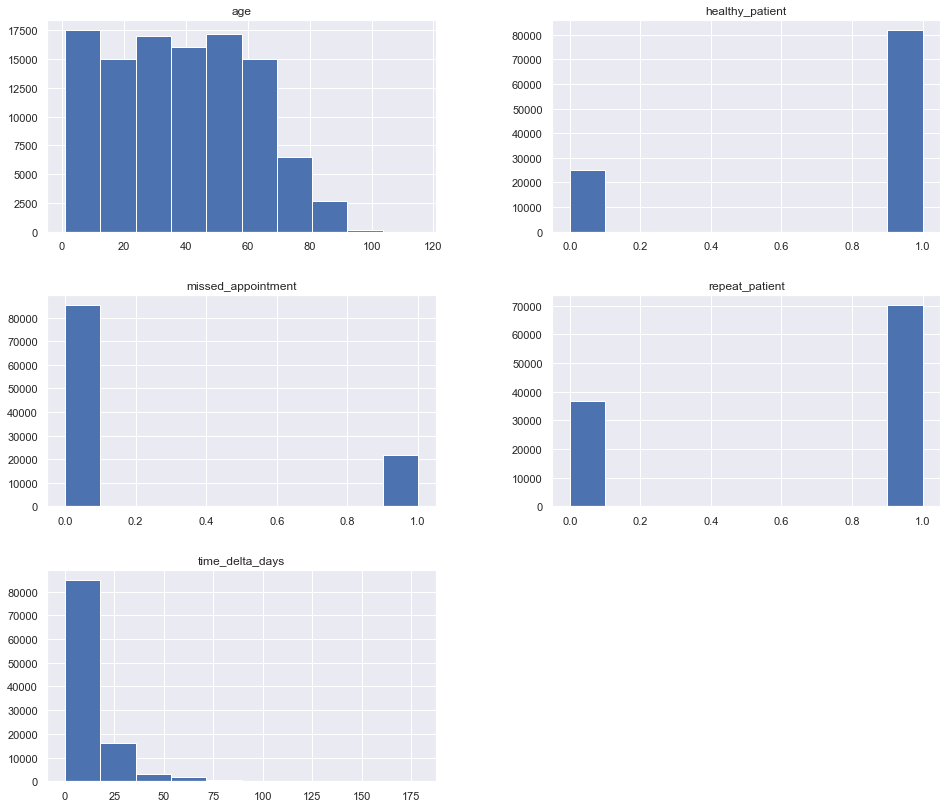

In [160]:
# Create a history plot for all of our columns.
edf.hist(figsize=(16,14));

In [161]:
# Describe the dataset.
edf.describe()

,missed_appointment,age,repeat_patient,healthy_patient,time_delta_days
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,0.202641,38.316085,0.655575,0.764317,10.007693
std,0.401969,22.466214,0.475183,0.424427,15.051250
min,0.000000,1.000000,0.000000,0.000000,0.140000
25%,0.000000,19.000000,0.000000,1.000000,0.490000
50%,0.000000,38.000000,1.000000,1.000000,3.500000
75%,0.000000,56.000000,1.000000,1.000000,13.710000
max,1.000000,115.000000,1.000000,1.000000,178.550000


### Missed Appointments
This dependent variable data. We will be analyzing the independent variables with the dependent variable.

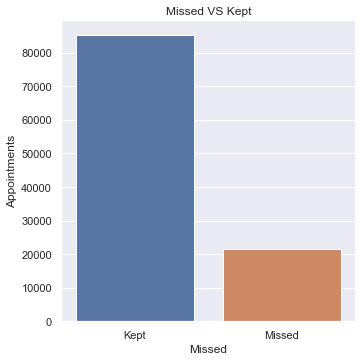

Appointments Missed: 20.26% or 21680 events
Out of 106987 appointments


In [162]:
import matplotlib.ticker as mtick

# Total appointments
appointments_counts = edf.missed_appointment.count()

# DF just for missed_appointment = 1, we will use this throughout the rest of the analysis
ma_df = edf.query('missed_appointment == 1')

# Set plot details for missed appointments
missed = sns.catplot(x="missed_appointment", kind='count', data=edf, orient="h")
missed.set_xticklabels(["Kept", "Missed"])
plt.title('Missed VS Kept')
plt.ylabel('Appointments')
plt.xlabel('Missed')
plt.show()

# General outputs
missed_appointment_counts = edf.missed_appointment.value_counts()
ma_missed = missed_appointment_counts[1]
ma_kept = missed_appointment_counts[0]
missed_ratio = round(((ma_missed / appointments_counts) * 100), 2)

print('Appointments Missed: {}% or {} events'.format(missed_ratio, ma_missed))
print('Out of {} appointments'.format(appointments_counts))

#### Since this is our dependent variable, let's output additional information about the dataset 

In [163]:
ma_df.head()

,missed_appointment,gender,age,repeat_patient,healthy_patient,neighborhood,day_of_week,time_delta_days
6,1,F,23,0,1,GOIABEIRAS,Friday,1.37
7,1,F,39,1,1,GOIABEIRAS,Friday,1.35
11,1,M,29,0,1,NOVA PALESTINA,Friday,2.64
17,1,F,40,0,1,CONQUISTA,Friday,0.60
20,1,F,30,1,1,NOVA PALESTINA,Friday,1.67


In [164]:
ma_df.describe()

,missed_appointment,age,repeat_patient,healthy_patient,time_delta_days
count,21680.0,21680.000000,21680.000000,21680.000000,21680.000000
mean,1.0,35.329151,0.681596,0.793312,15.377518
std,0.0,21.470631,0.465868,0.404939,16.541870
min,1.0,1.000000,0.000000,0.000000,0.140000
25%,1.0,18.000000,0.000000,1.000000,3.440000
50%,1.0,33.000000,1.000000,1.000000,9.940000
75%,1.0,52.000000,1.000000,1.000000,22.630000
max,1.0,115.000000,1.000000,1.000000,178.550000


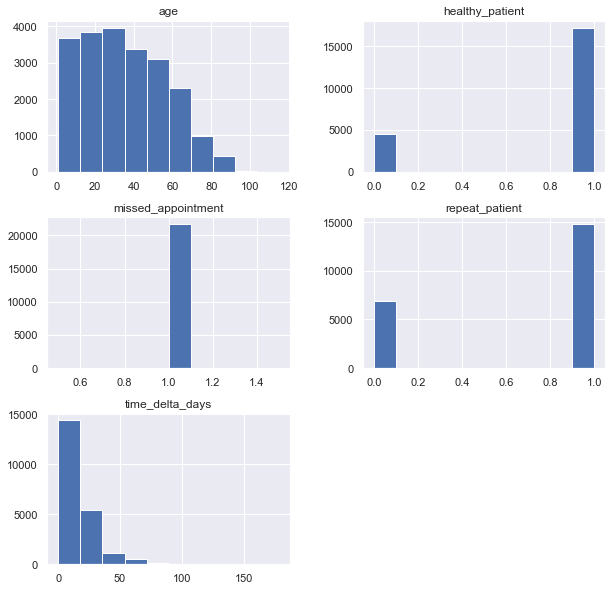

In [165]:
ma_df.hist();

### Question 1: Which gender missed appointments more frequently?

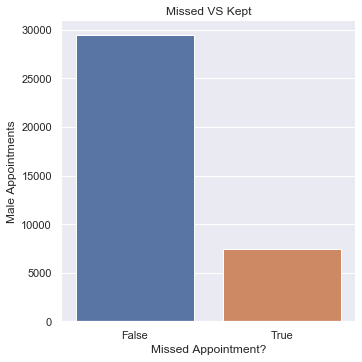

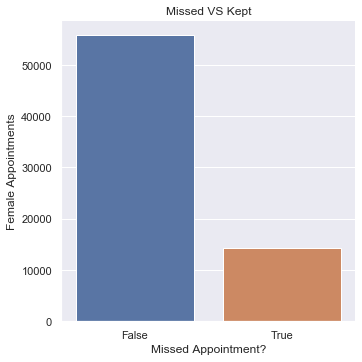

In [166]:
# Create DF for each genders to graph gender vs appointments kept / missed

## Male
male_df = edf.query('gender == "M"')
male_appointments = sns.catplot(x="missed_appointment", kind='count', data=male_df, orient="h")
male_appointments.set_xticklabels(["False", "True"])
plt.title('Missed VS Kept')
plt.ylabel('Male Appointments')
plt.xlabel('Missed Appointment?')
plt.show()

## Female
female_df = edf.query('gender == "F"')
female_appointments = sns.catplot(x="missed_appointment", kind='count', data=female_df, orient="h")
female_appointments.set_xticklabels(["False", "True"])
plt.title('Missed VS Kept')
plt.ylabel('Female Appointments')
plt.xlabel('Missed Appointment?')
plt.show()

As we can see, it is difficult to tell ***visually***, who missed more appointments. To be able to answer this question completely, we need to gather a few more details.

1. How many appointments for women
2. How many appointment for men
3. How many missed appointments for women
4. How many missed appointments for man

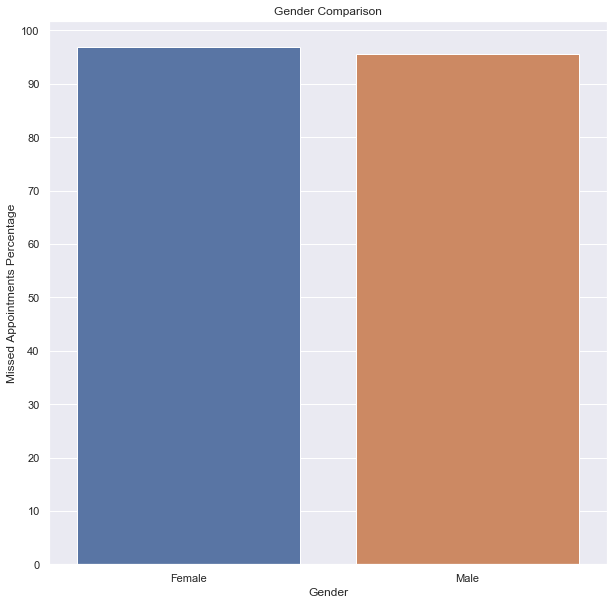

Females missed 20.36% of their appointments and males missed 20.08% of their appointments


In [167]:
# Create female related stats
female_missed = ma_df.gender.value_counts()['F']
female_total = edf.gender.value_counts()['F']
female_missed_percentage = round(((female_missed / female_total) * 100), 2)

# Create male related stats
male_missed = ma_df.gender.value_counts()['M']
male_total = edf.gender.value_counts()['M']
male_missed_percentage = round(((male_missed / male_total) * 100), 2)

def appender(label, counts):
    c = counts.astype('int64')
    for x in range(c):
        gender_data.append(label)

# Create gender data array
gender_data = []
appender('Male', (male_missed_percentage * 1000))
appender('Female', (female_missed_percentage * 1000))

# Create dataframe for male / female missed appointments comparison, with gender data array
datas = {'gender': gender_data}
gender_comparison_df = pd.DataFrame(data=datas).gender.value_counts().reset_index()
gender_comparison_df.columns = ['gender', 'counts']
gender_comparison_df.set_index('gender')

# Plot data from gender comparison df
plot_comparison = sns.barplot(x='gender', y='counts', data=gender_comparison_df);
plot_comparison.set_xticklabels(["Female", "Male"])

plt.title('Gender Comparison')
plt.ylabel('Missed Appointments Percentage')
plt.xlabel('Gender')

## Convert to percentages.
locs=[0,2100,4200,6300,8400,10500,12600,14700,16800,18900,21000]
lbls=['0','10','20','30','40','50','60','70','80','90','100']
plt.yticks(locs, lbls)
plt.show()

# Output the values from the graph
print('Females missed {}% of their appointments and males missed {}% of their appointments'.format(female_missed_percentage, male_missed_percentage))

##### This plot is a little easier to see that Females missed more appointment than Males, only by a very small margin.

### Question 2: What ages miss appointments more?

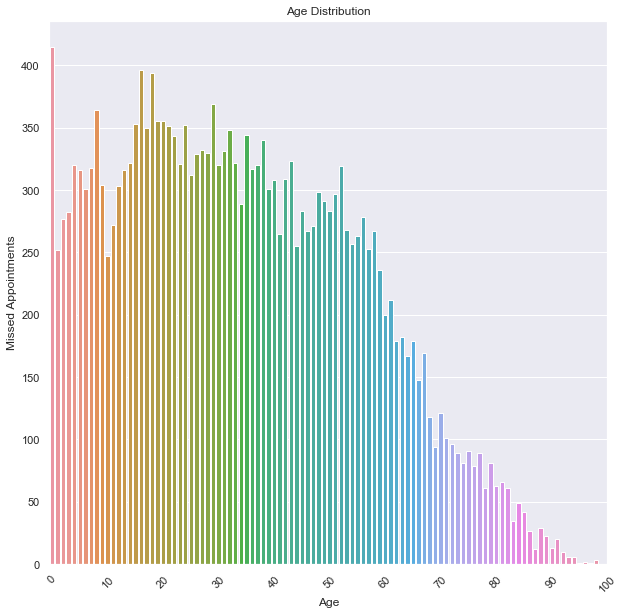

count    21680.000000
mean        35.329151
std         21.470631
min          1.000000
25%         18.000000
50%         33.000000
75%         52.000000
max        115.000000
Name: age, dtype: float64

In [168]:
# Create the age_df dataframe
age_df = edf.query('missed_appointment == 1')['age']

# Create the age df table
age = pd.DataFrame(age_df.value_counts()).reset_index()
age.columns = ['age', 'counts']
age.set_index('age')

# Plot the history of missed appointments vs age.
ax = sns.barplot(x='age', y='counts', data=age);
ax.set(xlabel='Age', ylabel='Missed Appointments')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Age Distribution')

## Convert to percentages.
locs=[0,10,20,30,40,50,60,70,80,90,100]
lbls=['0','10','20','30','40','50','60','70','80','90','100']
plt.xticks(locs, lbls)

plt.show()

age_df.describe()

#### Older patients miss less appointments, which surprises me. Children with less than 1 year have the highest misses. The graph shows less than age < 20 miss appointments more often. The .describe() output supports the findings as well. 

### Question 3: Are patients who visit multiple times a year more likely to miss appointments more often?

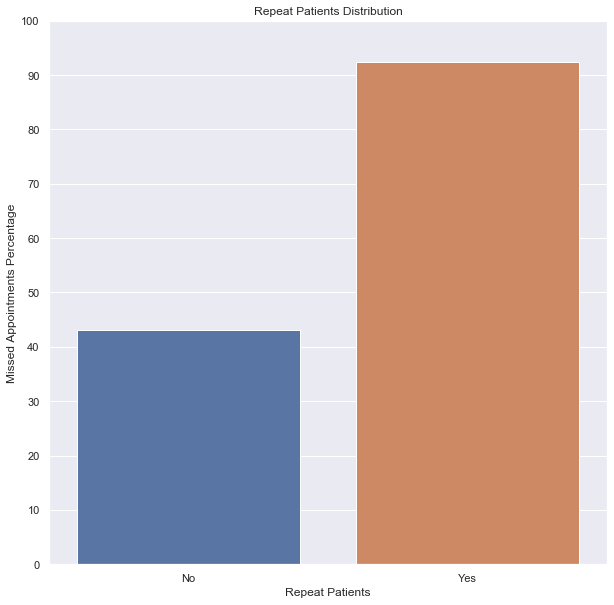

count    21680.000000
mean         0.681596
std          0.465868
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: repeat_patient, dtype: float64

In [169]:
# Graph repeat_patient missed appointments.
repeat_miss_df = edf.query('missed_appointment == 1')['repeat_patient']

# Create the repeat missed dataframe
repeat_miss = pd.DataFrame(repeat_miss_df.value_counts()).reset_index()
repeat_miss.columns = ['repeat_patient', 'counts']
repeat_miss.set_index('repeat_patient')

# Prep plot
ax = sns.barplot(x='repeat_patient', y='counts', data=repeat_miss);
ax.set(xlabel='Repeat Patients', ylabel='Missed Appointments Percentage')
ax.set_xticklabels(['No', 'Yes'])
plt.title('Repeat Patients Distribution')

## Convert to percentages.
locs=[0,1600,3200,4800,6400,8000,9600,11200,12800,14400,16000]
lbls=['0','10','20','30','40','50','60','70','80','90','100']
plt.yticks(locs, lbls)

plt.show()

repeat_miss_df.describe()

#### Yes, based off the plot, it does look like repeat patients are missing more often the non-repeat patients.

### Question 4: Do healthy patients miss appointments often? 

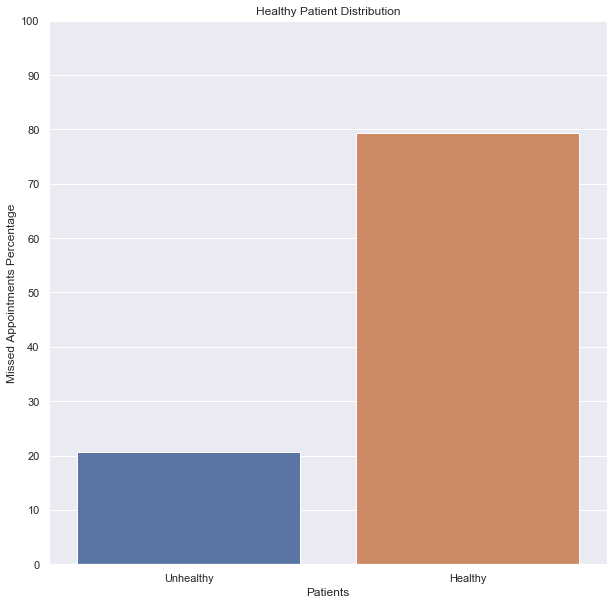

count    21680.000000
mean         0.793312
std          0.404939
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: healthy_patient, dtype: float64

In [170]:
# Graph healthy_patient missed appointments.

# Create the healthy_miss dataframe.
healthy_miss_df = edf.query('missed_appointment == 1')['healthy_patient']

healthy_miss = pd.DataFrame(healthy_miss_df.value_counts()).reset_index()
healthy_miss.columns = ['healthy_patient', 'counts']
healthy_miss.set_index('healthy_patient')

# Prep plot
ax = sns.barplot(x='healthy_patient', y='counts', data=healthy_miss);
ax.set(xlabel='Patients', ylabel='Missed Appointments Percentage')
ax.set_xticklabels(['Unhealthy', 'Healthy'])
plt.title('Healthy Patient Distribution')

## Convert to percentages.
locs=[0, 2168, 4336, 6504, 8672, 10840, 13008, 15176, 17344, 19512, 21680]
lbls=['0','10','20','30','40','50','60','70','80','90','100']
plt.yticks(locs, lbls)

plt.show()

healthy_miss_df.describe()

##### Interestingly, healthy patients miss appointments often.

##### It would be interesting to see how many of these healthy patients are also repeat patients.

### Question 5: Which top 10 locations have the most missed appointments?

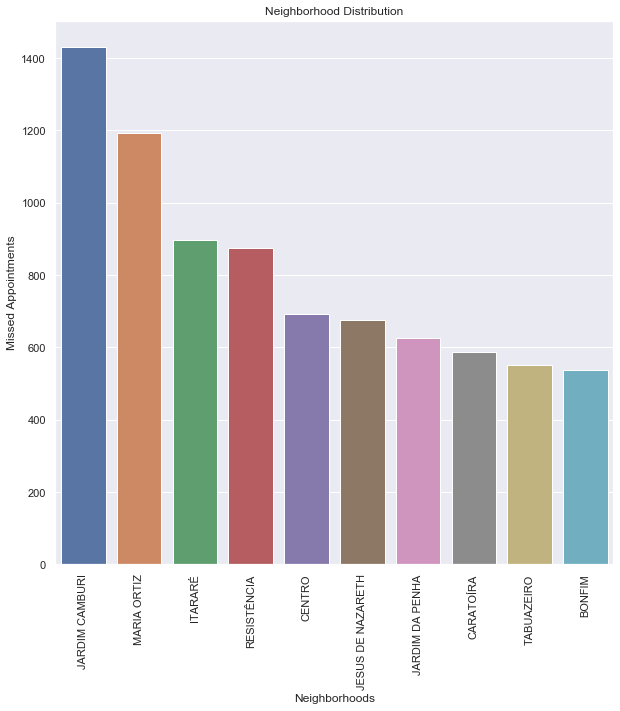

count              21680
unique                80
top       JARDIM CAMBURI
freq                1432
Name: neighborhood, dtype: object

In [183]:
# Graph healthy_patient missed appointments.
locations_df = edf.query('missed_appointment == 1')['neighborhood']

# Create the locations dataframe
locations = pd.DataFrame(locations_df.value_counts()).reset_index()
locations.columns = ['neighborhood', 'counts']
locations.set_index('neighborhood')
locations.sort_values('neighborhood', ascending=False)
locations = locations.iloc[:10, :]

# Prep plot
ax = sns.barplot(x='neighborhood', y='counts', data=locations);
ax.set(xlabel='Neighborhoods', ylabel='Missed Appointments')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Neighborhood Distribution')

plt.show()

locations_df.describe()

### Question 6: Do specific weekdays have more missed appointments?

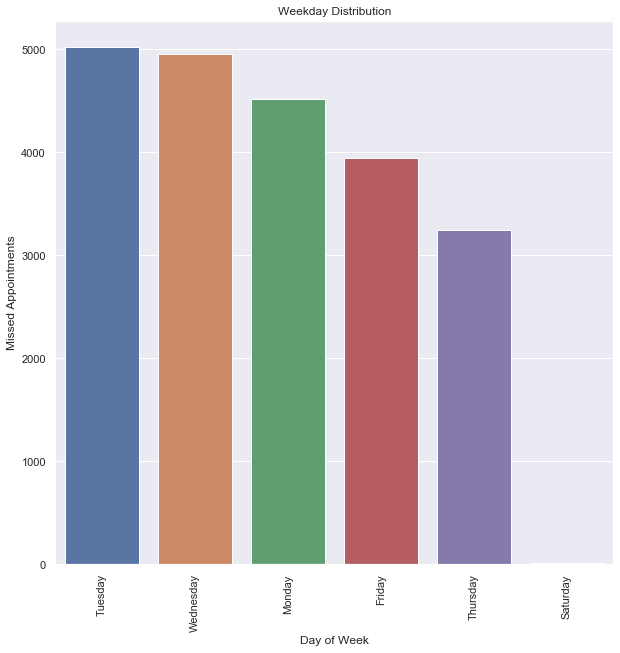

count       21680
unique          6
top       Tuesday
freq         5024
Name: day_of_week, dtype: object

In [175]:
# Graph healthy_patient missed appointments.
weekdays_df = edf.query('missed_appointment == 1')['day_of_week']

# Create the weekdays dataframe
weekdays = pd.DataFrame(weekdays_df.value_counts()).reset_index()
weekdays.columns = ['day_of_week', 'counts']
weekdays.set_index('day_of_week')

# Prep plot
ax = sns.barplot(x='day_of_week', y='counts', data=weekdays);
ax.set(xlabel='Day of Week', ylabel='Missed Appointments')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Weekday Distribution')

plt.show()

weekdays_df.describe()

##### Yes, apparently Tuesdays and Wednesdays have the most missed appointments.

### Question 7: Does higher time_delta_days (the number of days from the scheduling date to appointment date ) contribute to frequent missed appointments?

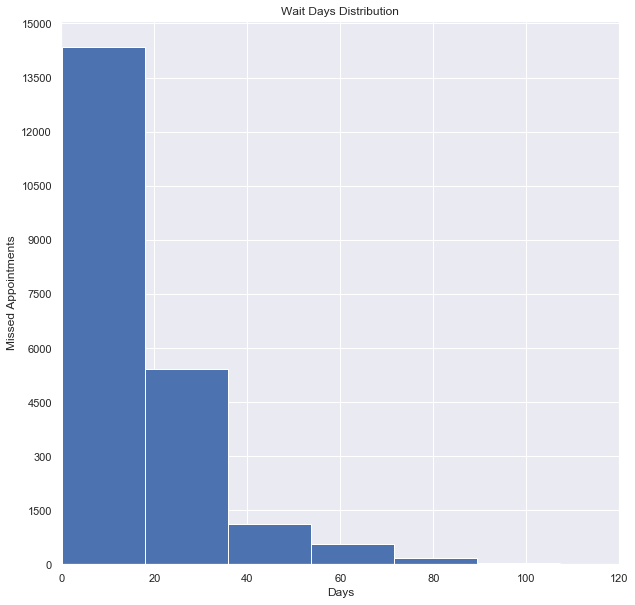

In [186]:
# Create time delta days dataframe
time_delta_days_df = edf.query('missed_appointment == 1')['time_delta_days']

# Plot missed appointments vs time_delta_days.
time_delta_days = pd.DataFrame(time_delta_days_df.value_counts()).reset_index()
time_delta_days.columns = ['time_delta_days', 'counts']
time_delta_days.set_index('time_delta_days')


xlocs = [0,20,40,60,80,100,120,140,160,180,200]
xlbls = ['0','20','40','60','80','100','120','140','160','180','200']
plt.xticks(xlocs, xlbls)

ylocs = [0, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000]
ylbls = ['0','1500','300','4500','6000','7500','9000','10500','12000','13500','15000']
plt.yticks(ylocs, ylbls)


time_delta_days_df.hist()

plt.title('Wait Days Distribution')
plt.ylabel('Missed Appointments')
plt.xlabel('Days')

plt.xlim([0,120])

plt.show()

##### Surprisingly, the longer wait days missed less appointment. The wait days with less than equal to 20 days missed the most appointments.

<a id='limitations'></a>
## Limitations

If the goal is to understand the causes of missed appointments for specific features (the 7 in this report), then additional data and processing is needed.

For example, at first, the dataset (Gender vs Missed Appointments) seems to declare that Females miss appointments by a gross margin. To answer the question correctly though, you have to compare Female misses to only the Female count, the same for Males. Once you do that comparison (which require more data manipulation, you are able to see each gender miss appointments nearly the same frequency.

In addition, one of the features (repeat_patients) illuminate that the data and assumptions are skewed due to patients having multiple repeat visits.

The dataset is a small, which would lead to conclusions that might not fit the masses all across Brazil.

<a id='conclusions'></a>
## Conclusions

The questions are attempting to draw a conclusion based on the features provided, would require additional data or subsets of data that allows plotting the answers more intuitive.

What we can conclude are the following:
- Gender: Females and Males miss appointments nearly at the same percentage.
- Age: Patients with less than 60 years of age miss more than patients older than 60.
- Repeat Patient: Repeat patients miss appointments 50% more than non-repeat patients.
- Healthy Patient: Healthy patients miss appointments nearly 60% more than non-healthy patients.
- Neighborhood: There are 80 neighborhoods represented and the Jardim Camburi location has the most missed appointments.
- Weekdays: Tuesday and Wednesday have the most missed appointments.
- Wait Days: Patients miss appointments at a high rate in the first 20 days.